# **Question: 01** (2 Marks)

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

a. Find f(2)

b. Find f'(2)

Do not hardcode. Use Polynomial class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [6]:
coeff=[2,1,-6,-2,2.5,1]
p=Polynomial(coeff)
print(p)
p_prime=p.deriv(1)
print(p_prime)
print("\nf(2)=")
print(p(2))
print("\nf'(2)=")
print(p_prime(2))


2.0 + 1.0·x - 6.0·x² - 2.0·x³ + 2.5·x⁴ + 1.0·x⁵
1.0 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴

f(2)=
36.0

f'(2)=
113.0


# **Question 2:** [6 Marks]

We already discussed the `calc_div_diff(x_data, y_data)` function in class to compute the full divided difference matrix from a set of known data points.

We also know that **Newton’s Divided Difference matrix** can be efficiently **extended** when a new node is added, instead of recomputing everything from scratch. This task focuses on implementing the function `expand_div_diff(x_data, y_data, diffMatrix)` to **append one new node** to an existing divided difference matrix.

---

Task 1: `expand_div_diff(x_data, y_data, diffMatrix)` \

You are given:

* `x_data`: a 1D list or array of the x-values (including the new node at the end),
* `y_data`: a 1D list or array of the y-values (including the new y),
* `diffMatrix`: a 2D numpy array containing the current divided difference table (upper-triangular),
  **excluding the last row and column** for the new node.

Your job is to:
1. Increase the shape by one.
2. Populate the secondary diagonal using,
   $$
   f[x_i, x_{i+1}, ..., x_{i+k}] = \frac{f[x_{i+1}, ..., x_{i+k}] - f[x_i, ..., x_{i+k-1}]}{x_{i+k} - x_i}
   $$
---

### Example:

```python
x_data = [1.0, 2.0, 4.0, 5.0]
y_data = [1.0, 4.0, 16.0, 26.0]

diffMatrix = np.array([
    [1.0, 3.0,  1.0],
    [4.0, 6.0,  0.0],
    [16.0, 0.0, 0.0]
])  # shape (3, 3)

# Your function should add the 4th row & 4th column
```

**Expected Output** (after expanding):

```python
array([
    [ 1.0,  3.0,  1.0, 0.08333333333 ],
    [ 4.0,  6.0,  1.3333333333, 0.0 ],
    [16.0,  10.0,  0.0, 0.0 ],
    [26.0,  0.0, 0.0, 0.0 ]
])
```

```Hint: The shape of the 2D array will increase by one```

Task 2: Expand a matrix
Now expand the following matrix.
```python
x_data = [0.5, 1.0, 2.0, 3.0]
y_data = [0.75, 1.0, 4.0, 9.0]

diffMatrix = np.array([
    [0.75,	0.5,	1.6666666666666667],
    [	1,	3,      0],
    [   4,  0,      0]
])
```

In [3]:
def expand_div_diff(x_data, y_data, diffMatrix):

SyntaxError: incomplete input (ipython-input-3500598961.py, line 1)

# **Question 3:**

You are given the following data points:

x = [0, 1, 2]

y = [1, 3, 2]

You are required to use the Vandermonde matrix method for polynomial interpolation.

**Task (i) (3 Marks):**

Construct the Vandermonde matrix for the given data points and compute the coefficients of the interpolating polynomial.

**Task (ii) (3 Marks):**

Using the polynomial coefficients from Task (i):


1.   Evaluate the interpolated value at x = 1.5.
2.   Plot the original data points and the interpolated polynomial over the interval x = 0 to x = 2.


matrix=
[[1. 0. 0.]
 [1. 1. 1.]
 [1. 2. 4.]]
[ 1.   3.5 -1.5]
1.0 + 3.5·x - 1.5·x²
Polynomial at x=1.5
2.874999999999998


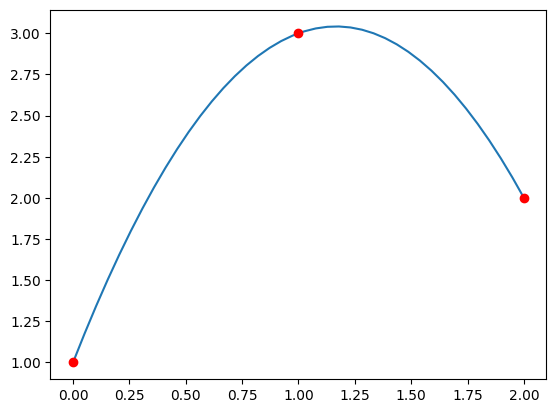

In [29]:
def get_poly(data_x,data_y):
  nodes=len(data_x)
  X=np.zeros((nodes,nodes))
  for i in range(nodes):
    for j in range(nodes):
      X[i][j]=data_x[i]**j


  #task1
  print("matrix=")
  print(X)
  x_inv= np.linalg.pinv(X)
  a=np.dot(x_inv,data_y)
  print(a)
  p=Polynomial(a)
  print(p)
  return p
#task2(i)
x= [0, 1, 2]
y= [1, 3, 2]
p=get_poly(x,y)
print("Polynomial at x=1.5")
print (p(1.5))

#task2(ii)

gg=np.linspace(0,2,40)
gf=p(gg)
plt.plot(gg,gf)
plt.plot(x,y,'ro')
plt.show()

#Question 4:
We have a function $f(x) =2x + 5 + 3x^{2}$.

A. Represent this function as polynomial and print it. [Hint. you can use any builtin library] &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(1 Marks)**

B. Assume, $x = 5$ and $h = [1, 0.5, 0.25]$. Find out the value of first derivative of $f(x)$ function for each **h** value using the backward differentiation formula. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(1.5 Marks)**

C. Calculate and display the differentiation error values that occur due to applying the backward difference formula for each value of h. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(1.5 Marks)**

D. According to Richardson Extrapolation method,

$$D_{h}^{(1)} = \frac{4 D_{\frac{h}{2} } - D_{h}}{3}$$<br>

$$D_{h}^{(2)} = \frac{16 D_{\frac{h}{2}}^{(1)} - D_{h}^{(1)} }{15}$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i. Convert $ D_{h}^{(1)}$, $D_{h}^{(2)}$ into python functions. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **(1 Marks)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii. Compute the Second Degree Richarson Extrapolation, $D_{h}^{(2)}$ at x = 5, h = 0.5. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **(1 Marks)**




In [31]:
#Write your code from here
#A
coeff=([5,2,3])
p=Polynomial(coeff)
print(p)

5.0 + 2.0·x + 3.0·x²


In [39]:
#B

def backward(p,x,h):
  return (p(x)-p(x-h))/h
x=5.0

print (f"First derivative when x=5,h=1\n:{(backward(p,x,1))}")
print (f"First derivative when x=5,h=0.5\n:{(backward(p,x,0.5))}")
print (f"First derivative when x=5,h=0.25\n:{(backward(p,x,0.25))}")

First derivative when x=5,h=1
:29.0
First derivative when x=5,h=0.5
:30.5
First derivative when x=5,h=0.25
:31.25


In [47]:
#c

px=p.deriv(1)
print(px)
exact=px(5)
error1=abs(exact-(backward(p,x,1)))
error2=abs(exact-(backward(p,x,0.5)))
error3= abs(exact-(backward(p,x,0.25)))
print("\nError When h=1")
print(error1)
print("\nError When h=0.5")
print(error2)
print("\nError When h=.25")
print(error3)

2.0 + 6.0·x

Error When h=1
3.0

Error When h=0.5
1.5

Error When h=.25
0.75


In [69]:
#
def central(p,x,h):
  return ((p(x+h)-p(x-h))/2*h)
def richaA(p,x,h):
  dh1=central(p,x,h)
  dh2=central(p,x,h/2)
  dh=(((4*dh2-dh1))/3)
  return dh

def richaB(p,x,h):
  dh3=richaA(p,x,h)
  dh4=richaA(p,x,h/2)
  dh5=(16*dh4-dh3)/15
  return dh5

print(richaB(p,5,0.6))



5.486968903925218e-15
